$
    \newcommand{\RR}{\mathbf{R}}
    \newcommand{\dv}[3][]{\frac{d^{#1} #2}{d {#3}^{#1}}}
    \newcommand{\dwrt}[2][]{\frac{d^{#1}}{d {#2}^{#1}}}
    \newcommand{\pdv}[3][]{\frac{\partial^{#1} #2}{\partial {#3}^{#1}}}
    \newcommand{\pdwrt}[2][]{\frac{\partial^{#1}}{\partial {#2}^{#1}}}
    \newcommand{\dd}[2][]{\ d^{#1}#2}
    \newcommand{\qty}[1]{\left[#1 \right]}
    \renewcommand{\exp}[1]{e^{#1}}
    \newcommand{\qq}[1]{\qquad \mathrm{#1}\qquad}
    \newcommand{\leadsto}{\quad & \implies \quad}
$

# MATH 310-10: Project 1
- Submitted 9/8/17 by Colton Grainger for MATH 310-10: Ordinary Differential Equations, Engineering Outreach
- **Text:** http://www.webpages.uidaho.edu/~barannyk/Teaching/matlab_project1.pdf

This document was prepared using the [SageMath](http://www.sagemath.org/) mathematics software system in a [Jupyter Notebook](http://jupyter.org/about.html) (formerly known as IPython). As Sage has many equivalent features to MATLAB, I believe that my work is compatible with what was expected from this assignment.

## 1.a

We will examine the slope field for the DE $\frac{dy}{dx} = -y-\sin(x)$ in the plane region $[-3,3]\times [-3,3]$. I'll ask my computer to create the slope field with the `plot_slope_field` function. I'll also overlay a solution curve (approximated with the 4th order Runge-Kutta method) and a set of points.

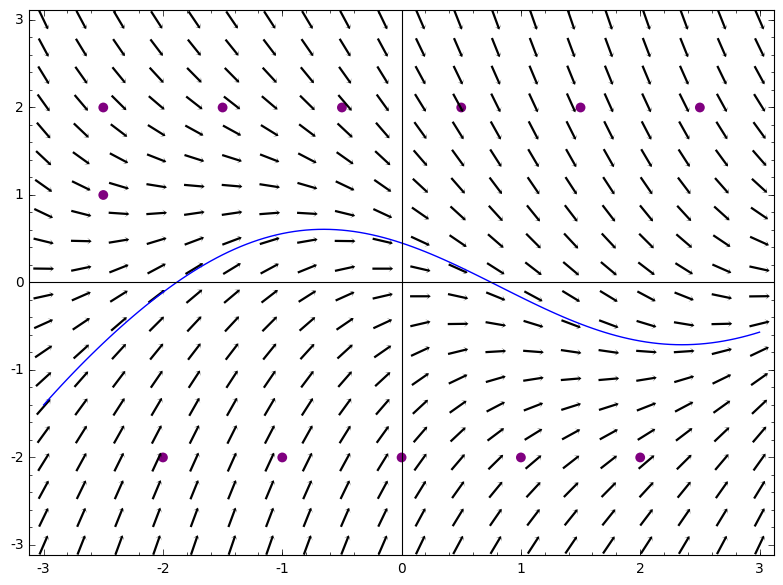

In [1]:
x,y = var('x y')
sf = plot_slope_field(-y-sin(x), (x, -3, 3), (y, -3, 3), headaxislength = 1, headlength = 2)
soln = list_plot(desolve_rk4(-y-sin(x),y,ics=[-3,-1.4],end_points=[-3,3],step=0.05), plotjoined=True)
coords = [(-2.5,1),(2.5,2),(1.5,2),(0.5,2),(-0.5,2),(-1.5,2),(-2.5,2),(-2,-2),(-1,-2),(0,-2),(1,-2),(2,-2)]
ic_pts = point(coords, size=50,color='purple');
show(sf + soln + ic_pts)

Let's introduce some more solution curves---one for each point plotted above.

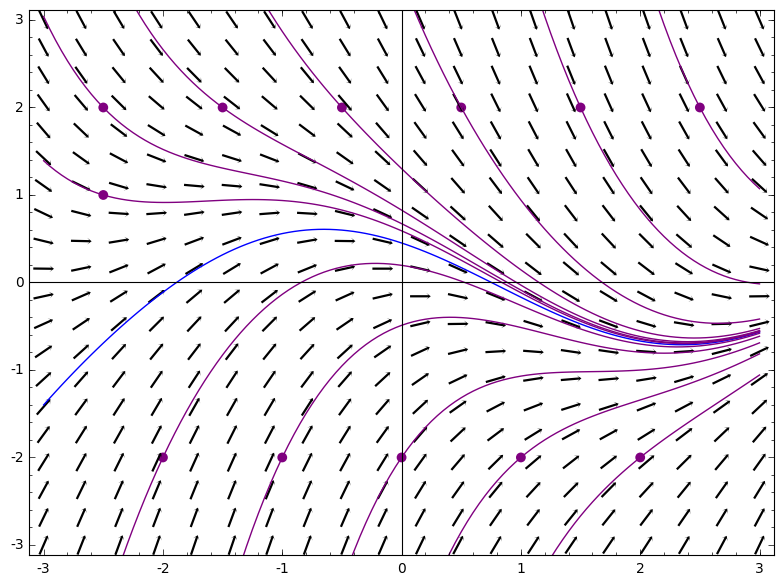

In [2]:
m = [list_plot(desolve_rk4(-y-sin(x),y,ics=n,end_points=[-3,3],step=0.05), plotjoined=True, color='purple')for n in coords]
r = sf + soln + ic_pts + m[0] + m[1] + m[2] + m[3] + m[4] + m[5] + m[6] + m[7] + m[8] + m[9] + m[10] + m[11]
r.show(xmin=-3, xmax=3, ymin=-3, ymax=3)

## 1.b

Let's look at the slope field for the DE $\frac{dy}{dx} = -x^2 + \sin(y)$, in the same region $[-3,3]\times [-3,3]$ as above. 

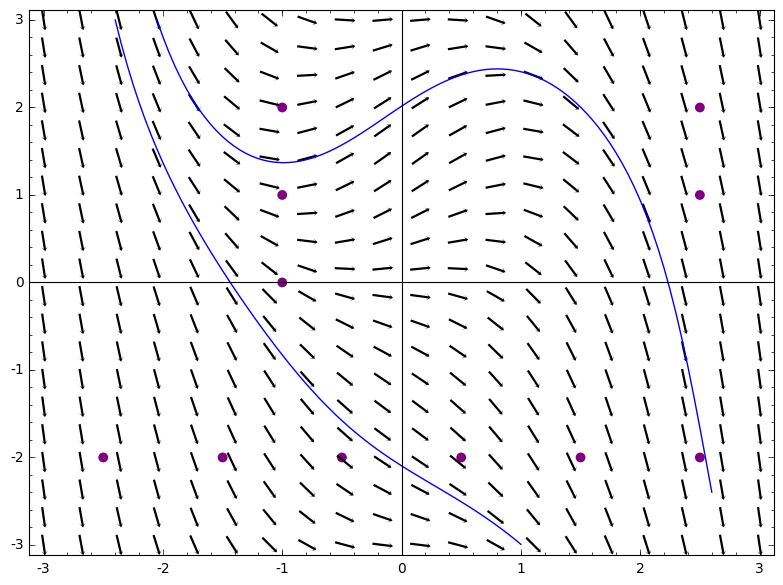

In [3]:
f = -x^2 + sin(y)
sf = plot_slope_field(f, (x, -3, 3), (y, -3, 3), headaxislength = 1, headlength = 2)
soln = [list_plot(desolve_rk4(f,y,ics=[-2.4,3],end_points=[-2.4,1],step=0.05), plotjoined=True),list_plot(desolve_rk4(f,y,ics=[-2.05,3],end_points=[-2.05,2.6],step=0.05), plotjoined=True)]
coords = [(-1,2),(-1,1),(-1,0),(2.5,2),(2.5,1),(-2.5,-2),(-1.5,-2),(-0.5,-2),(0.5,-2),(1.5,-2),(2.5,-2)]
ic_pts = point(coords, size=50,color='purple');
show(sf + soln[0] + soln[1] + ic_pts)

To draw various solution curves through each purple point, I've used a feature called "list comprension". Specifically, I asked Sage to run a Runge-Kutta method `for n in coords`, where `coords` is the list of tuples for each purple point. Indeed, each tuple is an initial condition for left and right numerical approximation, much like Polking's `dfield8` finds solutions (first approximating right, then left).

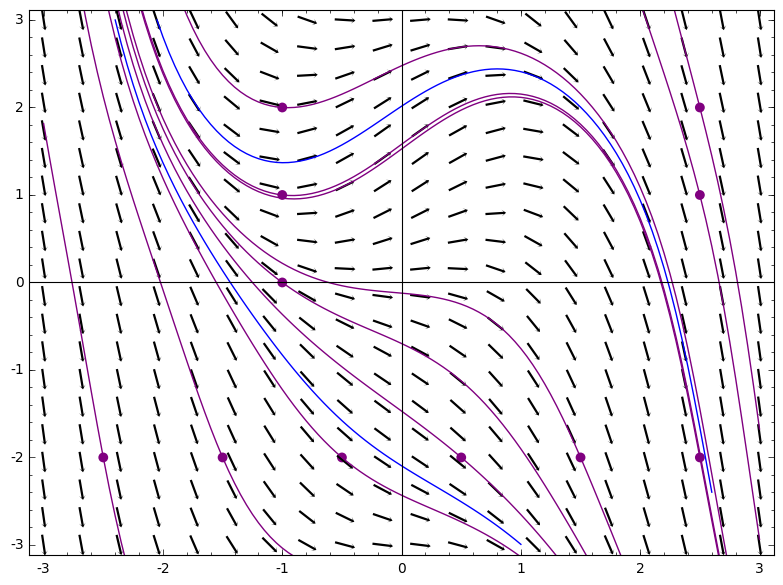

In [4]:
m = [list_plot(desolve_rk4(f,y,ics=n,end_points=[-3,3],step=0.05), plotjoined=True, color='purple') for n in coords]
r = sf + soln[0] + soln[1] + ic_pts + m[0] + m[1] + m[2] + m[3] + m[4] + m[5] + m[6] + m[7] + m[8] + m[9] + m[10]
r.show(xmin=-3, xmax=3, ymin=-3, ymax=3)

## 2.a 
We construct a slope field for the DE $y' = x + y$. Then we use the initial condition $y(0) = 0$ to find a particular solution curve. Finally, we evaluate $y(-4)$. 

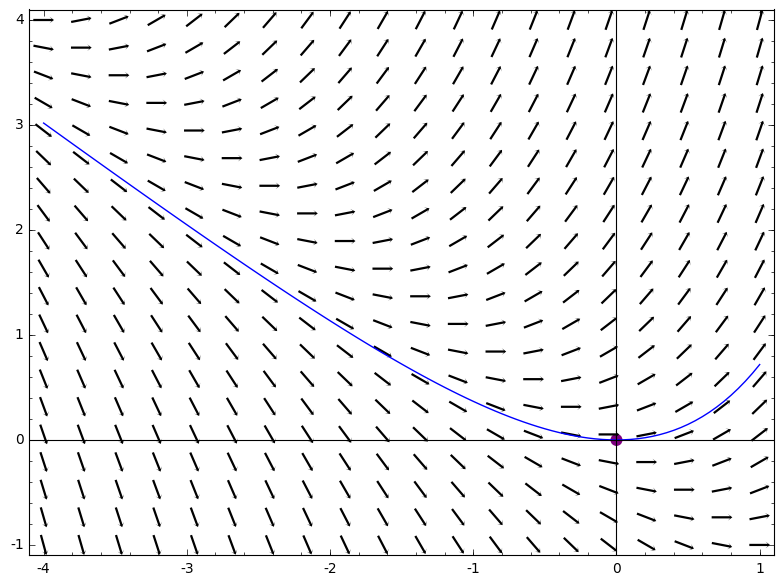

In [5]:
f(x,y) = y + x
sf = plot_slope_field(f, (x, -4, 1), (y, -1, 4), headaxislength = 1, headlength = 2)
soln = list_plot(desolve_rk4(f,y,ics=[0,0],end_points=[-4,1],step=0.05), plotjoined=True)
p = point((0,0), size=75,color='purple')
show(sf + soln + p)

It looks like $y(-4)$ is slightly larger than $3$. We can look at the data for our numerical approximation to find $y(-4)$ with high precision. I'll decrease the step size from $0.05$ to $0.01$.

In [6]:
desolve_rk4(f,y,ics=[0,0],end_points=[-4,1],step=0.01);

I hid the output of that computation, but `desolve_rk4` found 
- $y(-4)$ = `3.018315642866940`  with `step=0.05`
- $y(-4)$ = `3.018315638894891` with `step=0.01`.

## 2.b
Let's construct a slope field for the DE $y' = x + \frac{1}{2}y^2$. Then we'll apply $y(-2) = 0$. At last, we'll evaluate $y(2)$. 

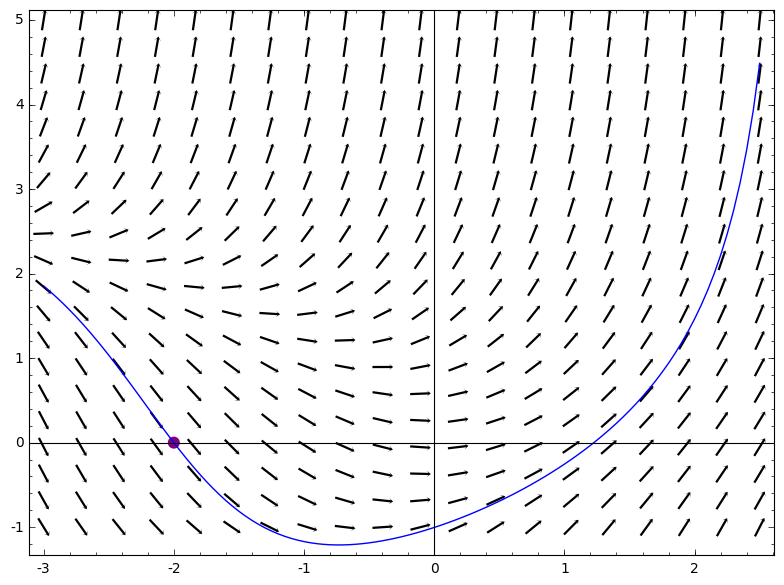

In [7]:
f = x + (1/2)*y^2
sf = plot_slope_field(f, (x, -3, 2.5), (y, -1, 5), headaxislength = 1, headlength = 2)
soln = list_plot(desolve_rk4(f,y,ics=[-2,0],end_points=[-3,2.5],step=0.05), plotjoined=True)
p = point((-2,0), size=75, color='purple')
show(sf + soln + p)

Again, it seems $y(2) \approx 1.2$. I'll look at the printout of `rk4` with `step=0.05` and `step=0.01`.

In [8]:
desolve_rk4(f,y,ics=[-2,0],end_points=[-3,2.5],step=0.05);

In [9]:
desolve_rk4(f,y,ics=[-2,0],end_points=[-3,2.5],step=0.01);

I hid those outputs. The `rk4` method found
- $y(-4)$ = `1.463315240292559`  with `step=0.05`
- $y(-4)$ = `1.463314964780048` with `step=0.01`

My guess was too low.

## 3

Consider the IVP
$$
    \dv{y}{x} = y\exp{x},\\
    y(0) = 2e.
$$

Separating variables and integrating, we have 
\begin{align}
    \int \frac{dy}{y} = \int \exp{x}\dd{x} \leadsto
        \log |y| = \exp{x} + \tilde{C}\\ \leadsto
        y = C\exp{\exp{x}}.
\end{align}

Applying the initial condition $y(0) = 2e$,
$$
    2e = C\exp{\exp{0}} \implies C = 2.
$$

Our particular solution is then
$$
    y(x) = 2\exp{\exp{x}}.
$$

We'll plot $y$ for $x \in [-1,1]$ over the slope field for $f(x,y) = y\exp{x}$.

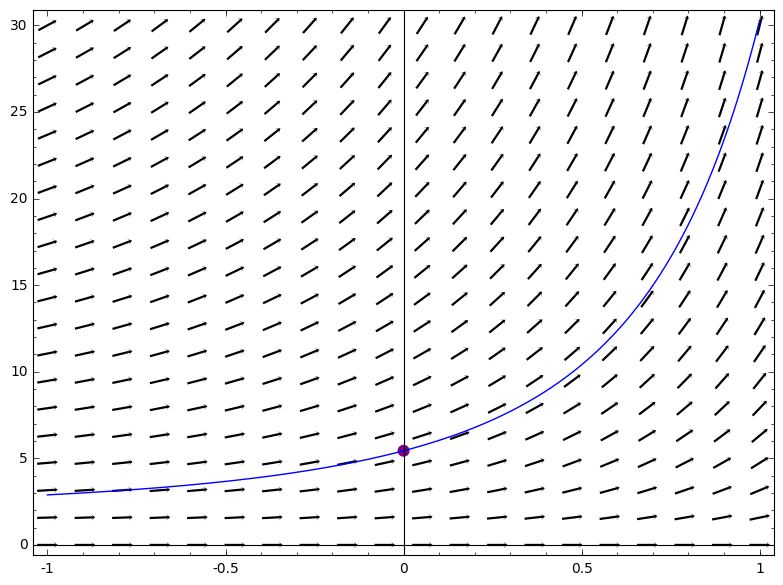

In [10]:
p = plot(2*exp(exp(x)), (-1,1))
ic = point((0,2*e), size=75, color='purple')
f = y*exp(x)
sf = plot_slope_field(f, (x, -1, 1), (y, 0, 30), headaxislength = 1, headlength = 2)
show(p + ic + sf)

I notice:
- the extreme $x$ dependence of the slope field,
- as $x \to -\infty$ we have $y \to 2$, and 
- the solution $y \equiv 0$ is nowhere near other solutions.